In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 聚类

## KMeans

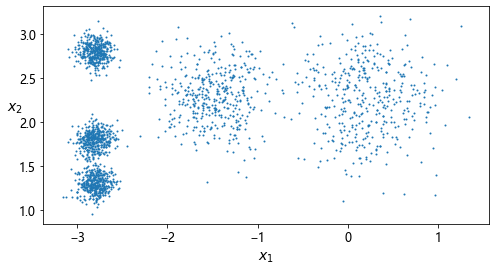

In [2]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
x, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(x, y=None):
    plt.scatter(x[:, 0], x[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(x)
plt.show()

In [3]:
np.shape(x)  # 2000个实例，每个实例2个特征

(2000, 2)

In [4]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(x)

In [5]:
y_pred

array([2, 4, 1, ..., 0, 1, 4])

In [6]:
kmeans.labels_  # .labels_保留了标签，等于y_pred

array([2, 4, 1, ..., 0, 1, 4])

In [7]:
kmeans.cluster_centers_  # 中心点坐标

array([[-2.79290307,  2.79641063],
       [ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [8]:
x_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(x_new)  # 预测新类别

array([1, 1, 0, 0])

In [9]:
 kmeans.transform(x_new)  # 返回每个点到各个中心的距离

array([[2.9042344 , 0.32995317, 2.88633901, 1.49439034, 2.81093633],
       [5.84739223, 2.80290755, 5.84236351, 4.4759332 , 5.80730058],
       [0.29040966, 3.29399768, 1.71086031, 1.69136631, 1.21475352],
       [0.36159148, 3.21806371, 1.21567622, 1.54808703, 0.72581411]])

### 自定义初始中心

In [10]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)  # n_init随机初始化次数

In [11]:
kmeans.fit(x)
kmeans.inertia_  # 惯性（距离），惯性越小，说明模型分类效果越好

211.5985372581683

### 小批量KMeans

惯性较高，但速度比较快

In [12]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(x)

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=5, random_state=42)

In [13]:
minibatch_kmeans.inertia_

211.93186531476786

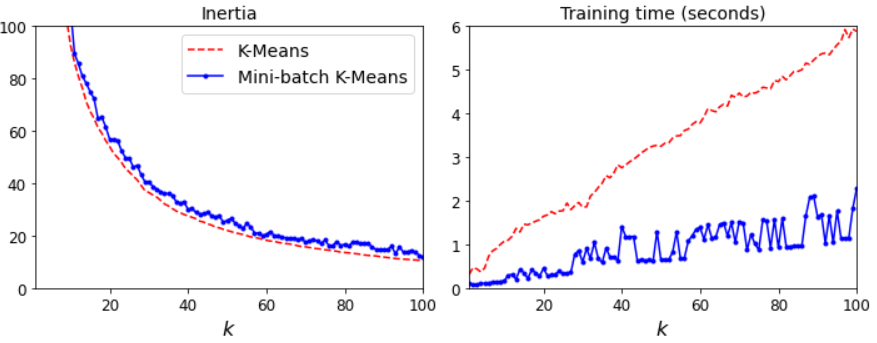

### 选取聚类数（轮廓分数）

In [14]:
from sklearn.metrics import silhouette_score  # 轮廓分数
silhouette_score(x, kmeans.labels_)

0.655517642572828

In [15]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x)
                for k in range(1, 10)]

In [16]:
kmeans_per_k

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

In [17]:
silhouette_scores = [silhouette_score(x, model.labels_)
                     for model in kmeans_per_k[1:]]

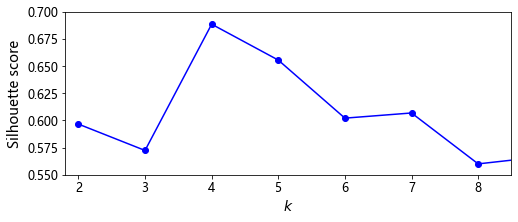

In [18]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

4 的分数比较高

## KMeans的局限

> 在KMeans聚类前，应该先比标准化。此外，对具有不同大小，不同密度或非球形的数据时，表现不佳。

## 使用聚类进行图像分割

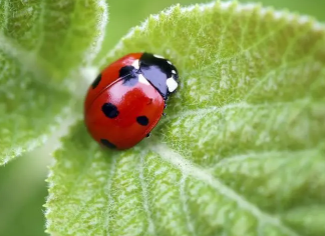

In [19]:
from matplotlib.image import imread
image = imread(r'C:\Users\hasee\images\unsupervised_learning\ladybug.png')
image.shape

(236, 325, 3)

图像表示为3维数组，这里是R,G,B三个通道，灰度图像只有一个通道，而一些具有透明度alpha通道的图像或者卫星图像，可能包含更多通道数据

In [20]:
x = image.reshape(-1, 3)  # 填-1则np根据另一个维度自动计算该维度，这里就是236*325*3/3=76700
kmeans = KMeans(n_clusters=8).fit(x)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [21]:
np.shape(x)

(76700, 3)

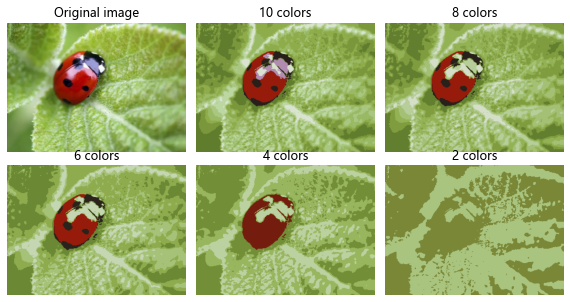

In [22]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(x)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## 用聚类进行预处理

In [23]:
from sklearn.datasets import load_digits

x_digits, y_digits = load_digits(return_X_y=True)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, random_state=42)  # 默认比例3：1

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [26]:
log_reg.score(x_test, y_test)  # 返回R方，作为基准准确率

0.9688888888888889

In [27]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50)), 
    # 将图片分为50个集群，将图像替换为其到50个集群的距离，虽然只有10个数字，但写法有不同，因此最好使用更大的集群数量，如50
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [28]:
pipeline.score(x_test, y_test)  # 有所提高

0.9844444444444445

### 网格搜索最佳聚类数

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(95, 100))  # 从95搜索到99
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=1)  # verbose=2 输出详细搜索进度
grid_clf.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(90, 100)}, verbose=1)

In [30]:
grid_clf.best_params_

{'kmeans__n_clusters': 99}

In [31]:
grid_clf.score(x_test, y_test)  # 精度达到0.98以上

0.9844444444444445

## 使用聚类进行半监督学习

In [32]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(x_train[:n_labeled], y_train[:n_labeled])  # 仅学习前50个带标签的实例

LogisticRegression(multi_class='ovr', random_state=42)

In [33]:
log_reg.score(x_test, y_test)  # 精度远比之前低

0.8333333333333334

In [34]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
x_digits_dist = kmeans.fit_transform(x_train)  # 把图片分为50个类
representative_digit_idx = np.argmin(x_digits_dist, axis=0)  # 选择50个距离聚类中心距离最短的数字序号
x_representative_digits = x_train[representative_digit_idx]  # 按照序号取出具有代表性的图像

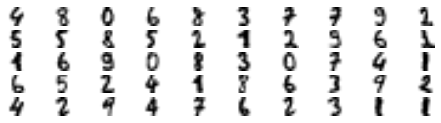

In [35]:
plt.figure(figsize=(8, 2))
for index, x_representative_digit in enumerate(x_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(x_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [36]:
y_representative_digits = y_train[representative_digit_idx]  # 实际上在半监督学习中通常没有现成的标记，需要手动标记

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_representative_digits, y_representative_digits)
log_reg.score(x_test, y_test)

0.9222222222222223

比不聚类效果要好得多，下面将标签传播到同一集群中的所有其他实例

In [37]:
y_train_propagated = np.empty(len(x_train) ,dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    # 把某类的标签传播到被聚为该类的所有标签（即便有些可能被错误聚类了）
log_reg.fit(x_train, y_train_propagated)
log_reg.score(x_test, y_test)

0.9333333333333333

效果也有所提升，但在聚类边缘的实例很有可能被错误标记了，因此我们再尝试把聚类标签扩散到中心以外75%的实例中

In [38]:
percentile_closest = 75

x_cluster_dist = x_digits_dist[np.arange(len(x_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = x_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    # 取cluster_dist位于percentile_closest%的分位数
    above_cutoff = (in_cluster > cutoff_distance)
    x_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (x_cluster_dist != -1)
x_train_partially_propagated = x_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [39]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train_partially_propagated, y_train_partially_propagated)
log_reg.score(x_test, y_test)

0.9333333333333333

没有明显提升

In [40]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])  # 准确率

0.9391239792130661

> 为了继续改进模型和训练集，下一步可能是进行几轮主动学习，即人类专家对模型预测最不缺的的实例进行标记，重复该过程，直到性能改进到不值得做标记为止。

## DBSCAN算法

> 对于每个实例，计算它在一小段距离epsilon内有多少个实例，该区域被称为$\epsilon-$邻域，如果一个实例在$\epsilon-$邻域中至少包含`min_samples`个实例，则实例被成为核心实例。任何不为核心实例且邻居中没用实例的实例都被视为异常实例。

很适合用来训练集群足够密集且被低密度区域很好隔开的数据。

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)  # eps 表示领域半径，min_samples为核心实例判别标准
dbscan.fit(x)

DBSCAN(eps=0.05)

In [42]:
dbscan.labels_[:10]  # 该属性可以查看标签，标记为-1的为异常实例

array([0, 0, 1, 2, 2, 2, 1, 0, 2, 3], dtype=int64)

In [43]:
dbscan.core_sample_indices_[:10]  # 获得核心实例的索引

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11], dtype=int64)

In [44]:
dbscan.components_  # 获得核心实例本身

array([[ 2.04219463,  0.4676126 ],
       [ 0.7222272 ,  0.61086963],
       [ 0.15136335,  0.89309351],
       ...,
       [ 1.93952106,  0.0590364 ],
       [ 1.2553367 , -0.51657859],
       [ 0.09330282,  0.04218133]])

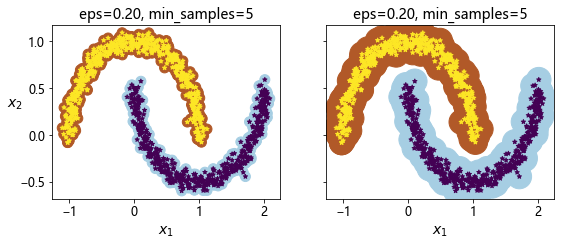

In [45]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

dbscan = DBSCAN(eps=0.2)
dbscan.fit(x)
plt.figure(figsize=(9, 3.2))
plt.subplot(121)
plot_dbscan(dbscan, x, size=100)
plt.subplot(122)
plot_dbscan(dbscan, x, size=600, show_ylabels=False)

plt.show()

使用两个不同邻域半径的DBSCAN聚类，半径0.05时没用被很好区分，并且有很多异常实例（标记×的），半径改为0.2时效果比较好

### 结合其他算法做预测

```
DBSCAN 有 fit_predict()方法，但是没有predict()方法，即只提供各实例对应的类别，但是不能用它对新实例做预测，用户可以自己用其他算法对DBSCAN所区分出的实例和对应的类别做训练并预测，下面用K近邻分类器做预测
```

In [46]:
dbscan = DBSCAN(eps=0.2)
dbscan.fit(x)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])  # 用核心实例和对应标签做训练

KNeighborsClassifier(n_neighbors=50)

In [47]:
x_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(x_new)

array([1, 0, 1, 0], dtype=int64)

In [48]:
knn.predict_proba(x_new)

array([[0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.14, 0.86],
       [1.  , 0.  ]])

由于训练集没有异常值，因此任何预测值都会被归到一个集群中，为此可以引入最大距离概念，距离两个集群都比较远的实例被归类为异常

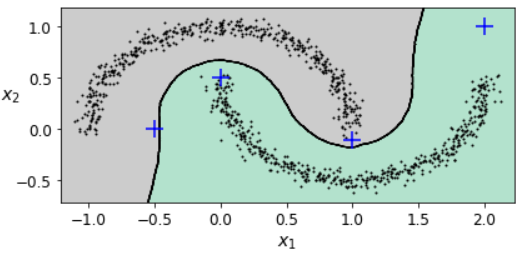

In [49]:
y_dist, y_pred_idx = knn.kneighbors(x_new, n_neighbors=1)
# .kneighbors() 返回指定实例（x_new）在训练集中最近邻居的距离和索引

In [50]:
y_dist, y_pred_idx

(array([[0.4080242 ],
        [0.00595623],
        [0.04403614],
        [0.40809709]]),
 array([[ 15],
        [593],
        [519],
        [976]], dtype=int64))

In [51]:
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1  # 距离大于0.2的重新标记为异常实例
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

### 复杂度

大约为$O(mlogm)$，但是如果eps大，sklearn的实现可能需要$O(m^2)$的内存

## 其他聚类算法

1. 聚集聚类
2. BIRCH
3. 均值漂移（与DBSCAN相似），复杂度$O(m^2)$，不适合大型数据集
4. 相似性传播，复杂度$O(m^2)$，不适合大型数据集
5. 谱聚类

# 高斯混合模型（GMM）

它假定实例是由多个参数未知的高斯分布（正态分布）的混合生成的。
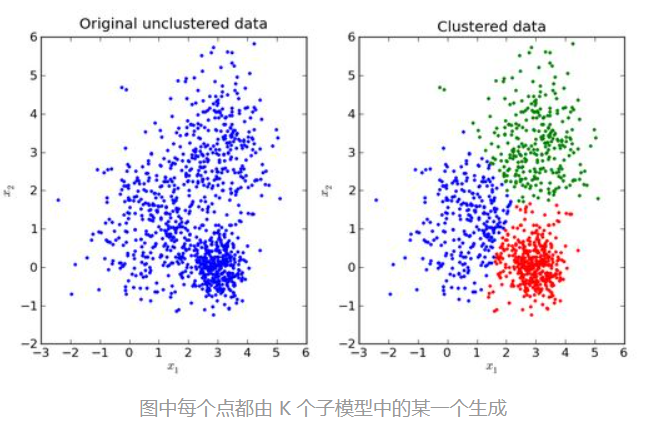

In [65]:
x1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
x1 = x1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
x2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
x2 = x2 + [6, -8]
x = np.r_[x1, x2]
y = np.r_[y1, y2]

In [66]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)  # n_init默认为1，建议调高避免次优解
gm.fit(x)

GaussianMixture(n_components=3, n_init=10)

In [67]:
gm.weights_  # 权重

array([0.4000662 , 0.20965228, 0.39028152])

In [68]:
gm.means_

array([[-1.40763984,  1.42710194],
       [ 3.39909717,  1.05933727],
       [ 0.05135313,  0.07524095]])

In [69]:
gm.covariances_  # 协方差

array([[[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

In [71]:
gm.converged_  # 检查算法是否收敛

True

In [72]:
gm.n_iter_  # 迭代次数

4

In [73]:
# 硬聚类，直接将预测实例分配给集群
gm.predict(x)

array([2, 2, 0, ..., 1, 1, 1], dtype=int64)

In [74]:
# 软聚类，返回属于集群的概率
gm.predict_proba(x)

array([[6.77397850e-07, 2.32389467e-02, 9.76760376e-01],
       [6.75361303e-04, 1.64685609e-02, 9.82856078e-01],
       [9.99923053e-01, 2.01535333e-06, 7.49319577e-05],
       ...,
       [2.13946075e-26, 9.99999571e-01, 4.28788333e-07],
       [1.46454409e-41, 1.00000000e+00, 5.12459171e-16],
       [8.02006365e-41, 1.00000000e+00, 2.27626238e-15]])

In [75]:
# 采样新实例，按照集群索引排序
x_new, y_new = gm.sample(6)
x_new

array([[-1.44795183,  0.83348784],
       [ 0.5462914 ,  3.82780465],
       [-1.24905226,  2.57368099],
       [ 2.87260513,  2.12641087],
       [ 0.01025471, -0.08478781],
       [ 0.57985807,  1.36513257]])

In [76]:
y_new

array([0, 0, 0, 1, 2, 2])

In [77]:
# 在给定任何位置给定估计模型的精度，该方法估计该位置的PDF的对数，分数越高，概率密度越高
gm.score_samples(x)

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

要估计实例落入特定区域的概率，就要在该区域对PDF积分

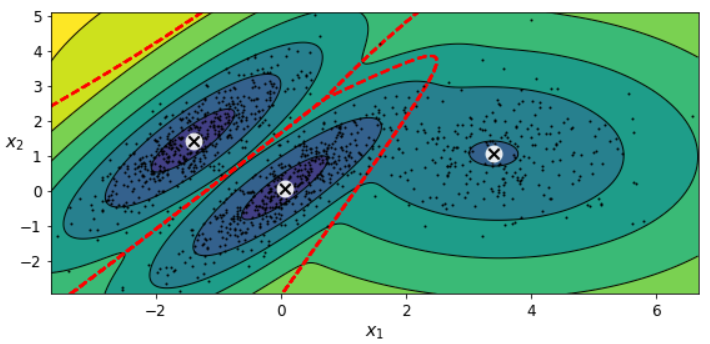

EM算法可能难以收敛找到最佳方案，一种方法是限制集群可能具有的形状和方向的范围，通过对协方差矩阵施加约束实现

```
超参数 covariance_type
1. shperical 所有集群都球型，可以有不同的半径（方差）;
2. diag 集群可以采用任何大小形状的椭圆形，但椭圆的轴必须平行于坐标轴（协方差矩阵必须是对角线）
3. tied 所有集群必须具有相同的椭圆形状、大小和方向（所有集群共享相同的协方差矩阵）
4. full（默认），无约束
```

复杂度：`shperical`和`diag`为$O(kmn)$；而`tied`和`full`为$O(kmn^2+kn^3)$，不会拓展到具有大量特征的数据集

## GMM模型进行异常检测

In [82]:
densities = gm.score_samples(x)  # 返回所有值的密度分数
density_threshold = np.percentile(densities, 4)  # 4%的实例将被标记为异常
anomalies = x[densities < density_threshold]  # 标记

高斯混合模型会尝试拟合所有数据，包括异常数据，因此如果有太多异常值，会使模型的政策性产生偏差，某些离群值可能被视为正常数据，因此可以先拟合一次，检测并剔除极端离群值，任何再次将模型拟合到清理完毕的数据集。

## 选择聚类数

1. 贝叶斯信息准则BIC：$BIC=log(m)·p-2log(\hat{L})$

2. 赤池信息准则AIC：$AIC=2P-2log(\hat{L})$

$m$是实例数，$p$是模型学习的参数数量，$\hat{L}$是模型似然函数最大值

In [84]:
gm.bic(x)

8189.74345832983

In [85]:
gm.aic(x)

8102.518178214792

In [91]:
import warnings
warnings.filterwarnings("ignore")

In [92]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(x)
             for k in range(1, 11)]  # 保存所有聚类数量的模型，后面一次计算bic和aic
bics = [model.bic(x) for model in gms_per_k]
aics = [model.aic(x) for model in gms_per_k]

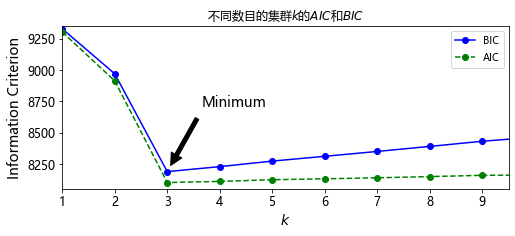

In [95]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.title('不同数目的集群$k$的$AIC$和$BIC$')
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

k=3时，AIC和BIC都是最低

## 贝叶斯高斯混合模型

该类可以为不必要的集群赋予等于或接近0的权重，将集群数目`n_components`设置为一个有充分理由相信的值，该值大于最佳集群的数量（假定对当前问题有一些了解），算法自动消除不必要的集群。

In [97]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)

In [98]:
bgm.fit(x)

BayesianGaussianMixture(n_components=10, n_init=10)

In [100]:
np.round(bgm.weights_, 2)  # 输出权重保留两位

array([0.4 , 0.21, 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

可见只需要三个集群

从高斯混合模型的原理可以看出，该模型不适合处理如卫星数据集这样显然不具有高斯分布的数据。

## 其他用于异常检测和新颖性检验的算法

1. PCA，异常检测
2. Fast-mcd，最小协方差决定，异常值检测
3. 隔离森林，异常值检测
4. 局部离群因子，离群值检测
5. 单类SVM，新颖性检测 